In [1]:
# Import the required tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Load the data
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.shape

(918, 12)

In [4]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

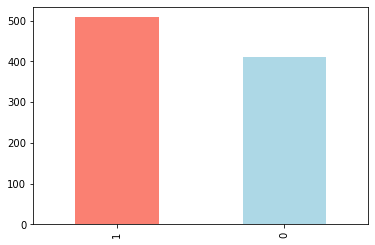

In [5]:
df["HeartDisease"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
pd.api.types.is_string_dtype(df["Sex"])

True

In [9]:
for labels,columns in df.items():
    if pd.api.types.is_string_dtype(columns):
        print(labels)

Sex
ChestPainType
RestingECG
ExerciseAngina
ST_Slope


In [10]:
# To turn string to category
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(1), int64(6)
memory usage: 55.5 KB


In [12]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
df["Sex"].cat.categories

Index(['F', 'M'], dtype='object')

In [14]:
df.Sex.cat.codes

0      1
1      0
2      1
3      0
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Length: 918, dtype: int8

In [15]:
df.ChestPainType.cat.codes

0      1
1      2
2      1
3      0
4      2
      ..
913    3
914    0
915    0
916    1
917    2
Length: 918, dtype: int8

In [16]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [17]:
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [31]:
df.Sex

0      2
1      1
2      2
3      1
4      2
      ..
913    2
914    2
915    2
916    1
917    2
Name: Sex, Length: 918, dtype: int8

In [19]:
pd.crosstab(df.HeartDisease,df.Sex)

Sex,F,M
HeartDisease,,
0,143,267
1,50,458


In [32]:
# Split the data into x and y
x = df.drop('HeartDisease',axis=1)

y = df['HeartDisease']

x.head(), y.head()

(   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
 0   40    2              2        140          289          0           2   
 1   49    1              3        160          180          0           2   
 2   37    2              2        130          283          0           3   
 3   48    1              1        138          214          0           2   
 4   54    2              3        150          195          0           2   
 
    MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
 0    172               1      0.0         3  
 1    156               1      1.0         2  
 2     98               1      0.0         3  
 3    108               2      1.5         2  
 4    122               1      0.0         3  ,
 0    0
 1    1
 2    0
 3    1
 4    0
 Name: HeartDisease, dtype: int64)

In [33]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,2,2,140,289,0,2,172,1,0.0,3
1,49,1,3,160,180,0,2,156,1,1.0,2
2,37,2,2,130,283,0,3,98,1,0.0,3
3,48,1,1,138,214,0,2,108,2,1.5,2
4,54,2,3,150,195,0,2,122,1,0.0,3


In [34]:
#  Split the data into train and test sets
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [35]:
x_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,2,3,120,240,1,2,194,1,0.8,1
25,36,2,3,130,209,0,2,178,1,0.0,3
84,56,2,1,150,213,1,2,125,2,1.0,2
10,37,1,3,130,211,0,2,142,1,0.0,3
344,51,2,1,120,0,1,2,104,1,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
106,48,1,1,120,254,0,3,110,1,0.0,3
270,45,2,1,120,225,0,2,140,1,0.0,3
860,60,2,1,130,253,0,2,144,2,1.4,3
435,60,2,1,152,0,0,3,118,2,0.0,3


In [36]:
len(x_test) , len(y_test)

(184, 184)

In [25]:
# models = {"Logistic Regression" : LogisticRegression(),
#           "KNN": KNeighborsClassifier(),
#           "Random Forest": RandomForestClassifier()}

# def fit_and_score(models,x_train,x_test,y_train,y_test):
#     np.random.seed(42)
#     model_scores = {}
#     for name,model in models.items():
#         model.fit(x_train,y_train)
#         model_scores[name] = model.score(x_test,y_test)
#     return model_scores

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(1), int64(6)
memory usage: 55.5 KB


In [27]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes + 1

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int8   
 2   ChestPainType   918 non-null    int8   
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int8   
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int8   
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int8   
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), int8(5)
memory usage: 54.8 KB


In [52]:
models = {"Logistic Regression" : LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [46]:
fit_and_score(models,x_train,x_test,y_train,y_test)

{'Random Forest': 0.8804347826086957}

In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modela, x_train, y_train, cv=5)

In [51]:
scores

array([0.87755102, 0.9047619 , 0.86394558, 0.83673469, 0.85616438])

In [69]:
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(2,20,2)}

In [70]:
np.random.seed(42)

rs = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=rf_grid,
                       cv=5,
                       n_iter=20,
                       verbose=True)

rs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [71]:
rs.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 6,
 'max_depth': None}

In [72]:
rs.score(x_test,y_test)

0.8804347826086957

In [62]:
rf_grid = {"n_estimators":[50,100,200,900],
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [65]:
gs = GridSearchCV(RandomForestClassifier(),
                 param_grid=rf_grid,
                 cv=5,
                 verbose=5)

gs.fit(x_train,y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.878 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.850 total time=   0.2s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.829 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.871 total time=   0.4s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.4s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.837

[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=0.830 total time=   0.4s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=0.856 total time=   0.3s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.891 total time=   0.8s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.905 total time=   0.7s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.850 total time=   0.8s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.823 total time=   0.7s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.863 total time=   0.7s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=900;, score=0.884 total time=   3.8s
[CV 2/5] END max_depth=None, min_samples

[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=900;, score=0.905 total time=   3.7s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=900;, score=0.850 total time=   3.5s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=900;, score=0.830 total time=   3.6s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=900;, score=0.849 total time=   3.7s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=50;, score=0.905 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=50;, score=0.850 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=None, min_sam

[CV 1/5] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.891 total time=   0.3s
[CV 2/5] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.912 total time=   0.3s
[CV 3/5] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.850 total time=   0.3s
[CV 4/5] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.864 total time=   0.3s
[CV 5/5] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.856 total time=   0.3s
[CV 1/5] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.898 total time=   0.8s
[CV 2/5] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.898 total time=   0.7s
[CV 3/5] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.850 total time=   0.8s
[CV 4/5] END max_depth=None, min_samples

[CV 5/5] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.842 total time=   0.7s
[CV 1/5] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=900;, score=0.884 total time=   3.5s
[CV 2/5] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=900;, score=0.898 total time=   3.5s
[CV 3/5] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=900;, score=0.857 total time=   3.6s
[CV 4/5] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=900;, score=0.816 total time=   3.6s
[CV 5/5] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=900;, score=0.863 total time=   3.6s
[CV 1/5] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.878 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.898 total time=   0.1s
[CV 3/5] END max_depth=None, min_s

[CV 3/5] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=50;, score=0.857 total time=   0.2s
[CV 4/5] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=50;, score=0.803 total time=   0.2s
[CV 5/5] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=50;, score=0.822 total time=   0.2s
[CV 1/5] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=100;, score=0.898 total time=   0.4s
[CV 2/5] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=100;, score=0.898 total time=   0.3s
[CV 3/5] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=100;, score=0.830 total time=   0.4s
[CV 5/5] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=100;, score=0.829 total time=   0.4s
[CV 1/5] END max_depth=None, min_sa

[CV 2/5] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=0.898 total time=   1.1s
[CV 3/5] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=0.864 total time=   0.9s
[CV 4/5] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=0.823 total time=   0.7s
[CV 5/5] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=200;, score=0.842 total time=   0.6s
[CV 1/5] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=900;, score=0.891 total time=   5.4s
[CV 2/5] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=900;, score=0.898 total time=   7.9s
[CV 3/5] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=900;, score=0.857 total time=   4.6s
[CV 4/5] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=900;, score=0.837 total time=   4.8s
[CV 5/5] END max_depth=None, min_samples

[CV 2/5] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=50;, score=0.891 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=50;, score=0.850 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=50;, score=0.856 total time=   0.2s
[CV 1/5] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=100;, score=0.891 total time=   0.3s
[CV 2/5] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=100;, score=0.891 total time=   0.3s
[CV 3/5] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=100;, score=0.816 total time=   0.3s
[CV 5/5] END max_depth=None, min_sam

[CV 5/5] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=100;, score=0.849 total time=   0.4s
[CV 1/5] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.7s
[CV 2/5] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=200;, score=0.891 total time=   0.9s
[CV 3/5] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=200;, score=0.850 total time=   1.0s
[CV 4/5] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=200;, score=0.850 total time=   1.0s
[CV 5/5] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=200;, score=0.836 total time=   0.9s
[CV 1/5] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=900;, score=0.891 total time=   4.4s
[CV 2/5] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=900;, score=0.884 total time=   4.4s
[CV 3/5] END max_depth=None, min_samples

[CV 4/5] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=900;, score=0.844 total time=   3.6s
[CV 5/5] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=900;, score=0.842 total time=   3.7s
[CV 1/5] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=50;, score=0.898 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=50;, score=0.864 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=50;, score=0.837 total time=   0.2s
[CV 5/5] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=50;, score=0.836 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=100;, score=0.884 total time=   0.4s
[CV 2/5] END max_depth=None, min_sample

[CV 2/5] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=100;, score=0.884 total time=   0.7s
[CV 3/5] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=100;, score=0.857 total time=   0.7s
[CV 4/5] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=100;, score=0.844 total time=   0.7s
[CV 5/5] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=100;, score=0.836 total time=   0.7s
[CV 1/5] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=200;, score=0.898 total time=   1.3s
[CV 2/5] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=200;, score=0.898 total time=   1.0s
[CV 3/5] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=200;, score=0.864 total time=   0.7s
[CV 4/5] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=200;, score=0.844 total time=   0.8s
[CV 5/5] END max_depth=None, min

[CV 1/5] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=900;, score=0.891 total time=   2.8s
[CV 2/5] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=900;, score=0.884 total time=   3.0s
[CV 3/5] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=900;, score=0.864 total time=   2.7s
[CV 4/5] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=900;, score=0.844 total time=   2.8s
[CV 5/5] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=900;, score=0.836 total time=   2.7s
[CV 1/5] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=50;, score=0.891 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=50;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=50;, score=0.871 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_le

[CV 1/5] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=100;, score=0.898 total time=   0.2s
[CV 2/5] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=100;, score=0.891 total time=   0.2s
[CV 3/5] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=100;, score=0.857 total time=   0.3s
[CV 4/5] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=100;, score=0.857 total time=   0.2s
[CV 5/5] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=100;, score=0.829 total time=   0.3s
[CV 1/5] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=200;, score=0.891 total time=   0.5s
[CV 2/5] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=200;, score=0.891 total time=   0.5s
[CV 3/5] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=200;, score=0.857 total time=   0.5s
[CV 4/5] END max_depth=None, min

[CV 4/5] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=200;, score=0.850 total time=   0.6s
[CV 5/5] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=200;, score=0.836 total time=   0.6s
[CV 1/5] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=900;, score=0.891 total time=   2.8s
[CV 2/5] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=900;, score=0.878 total time=   2.8s
[CV 3/5] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=900;, score=0.864 total time=   2.9s
[CV 4/5] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=900;, score=0.830 total time=   2.9s
[CV 5/5] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=900;, score=0.836 total time=   2.8s
[CV 1/5] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=None, min_

[CV 2/5] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=50;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=50;, score=0.857 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=50;, score=0.830 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=50;, score=0.856 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=100;, score=0.898 total time=   0.2s
[CV 2/5] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=100;, score=0.884 total time=   0.2s
[CV 3/5] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=100;, score=0.857 total time=   0.2s
[CV 4/5] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=100;, score=0.830 total time=   0.2s
[CV 5/5] END max_depth=None, min_sam

[CV 5/5] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=100;, score=0.836 total time=   0.2s
[CV 1/5] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=200;, score=0.891 total time=   0.6s
[CV 2/5] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=200;, score=0.878 total time=   0.6s
[CV 3/5] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=200;, score=0.871 total time=   0.6s
[CV 4/5] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=200;, score=0.850 total time=   0.6s
[CV 5/5] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=200;, score=0.822 total time=   0.6s
[CV 1/5] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=900;, score=0.891 total time=   2.8s
[CV 2/5] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=900;, score=0.884 total time=   2.8s
[CV 3/5] END max_depth=N

[CV 3/5] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=900;, score=0.864 total time=   2.9s
[CV 4/5] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=900;, score=0.830 total time=   2.7s
[CV 5/5] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=900;, score=0.829 total time=   2.8s
[CV 1/5] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=50;, score=0.891 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=50;, score=0.857 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=50;, score=0.837 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=50;, score=0.829 total time=   0.1s
[CV 1/5] END max_depth=None, min_samp

[CV 1/5] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=100;, score=0.898 total time=   0.3s
[CV 2/5] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=100;, score=0.878 total time=   0.2s
[CV 3/5] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=100;, score=0.857 total time=   0.2s
[CV 4/5] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=100;, score=0.844 total time=   0.2s
[CV 5/5] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=100;, score=0.836 total time=   0.2s
[CV 1/5] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=200;, score=0.878 total time=   0.6s
[CV 2/5] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.6s
[CV 3/5] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=200;, score=0.857 total time=   0.6s
[CV 4/5] END max_depth=N

[CV 4/5] END max_depth=None, min_samples_leaf=13, min_samples_split=16, n_estimators=200;, score=0.857 total time=   0.6s
[CV 5/5] END max_depth=None, min_samples_leaf=13, min_samples_split=16, n_estimators=200;, score=0.836 total time=   0.6s
[CV 1/5] END max_depth=None, min_samples_leaf=13, min_samples_split=16, n_estimators=900;, score=0.891 total time=   2.8s
[CV 2/5] END max_depth=None, min_samples_leaf=13, min_samples_split=16, n_estimators=900;, score=0.884 total time=   2.8s
[CV 3/5] END max_depth=None, min_samples_leaf=13, min_samples_split=16, n_estimators=900;, score=0.857 total time=   2.8s
[CV 4/5] END max_depth=None, min_samples_leaf=13, min_samples_split=16, n_estimators=900;, score=0.830 total time=   2.8s
[CV 5/5] END max_depth=None, min_samples_leaf=13, min_samples_split=16, n_estimators=900;, score=0.829 total time=   2.8s
[CV 1/5] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=50;, score=0.878 total time=   0.1s
[CV 2/5] END max_depth=No

[CV 2/5] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=50;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=50;, score=0.850 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=50;, score=0.837 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=50;, score=0.822 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=100;, score=0.878 total time=   0.2s
[CV 2/5] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=100;, score=0.884 total time=   0.3s
[CV 3/5] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=100;, score=0.850 total time=   0.2s
[CV 4/5] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=100;, score=0.830 total time=   0.2s
[CV 5/5] END max_depth=None, min_sam

[CV 5/5] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=100;, score=0.829 total time=   0.2s
[CV 1/5] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=200;, score=0.891 total time=   0.5s
[CV 2/5] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=200;, score=0.884 total time=   0.6s
[CV 3/5] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=200;, score=0.864 total time=   0.6s
[CV 4/5] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=200;, score=0.837 total time=   0.6s
[CV 5/5] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=200;, score=0.829 total time=   0.5s
[CV 1/5] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=900;, score=0.891 total time=   2.9s
[CV 2/5] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=900;, score=0.884 total time=   2.9s
[CV 3/5] END max_depth=N

[CV 3/5] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=900;, score=0.857 total time=   2.8s
[CV 4/5] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=900;, score=0.837 total time=   2.8s
[CV 5/5] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=900;, score=0.829 total time=   3.0s
[CV 1/5] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=50;, score=0.878 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=50;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=50;, score=0.857 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=17, min_samples_split=2, n_estimators=50;, score=0.829 total time=   0.1s
[CV 1/5] END max_depth=None, min_s

[CV 1/5] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=100;, score=0.884 total time=   0.2s
[CV 3/5] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=100;, score=0.837 total time=   0.2s
[CV 5/5] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=100;, score=0.836 total time=   0.3s
[CV 1/5] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=200;, score=0.891 total time=   0.5s
[CV 2/5] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=200;, score=0.884 total time=   0.6s
[CV 3/5] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=200;, score=0.864 total time=   0.6s
[CV 4/5] END max_depth=None, min

[CV 4/5] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=200;, score=0.837 total time=   0.5s
[CV 5/5] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=200;, score=0.836 total time=   0.6s
[CV 1/5] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=900;, score=0.891 total time=   2.9s
[CV 2/5] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=900;, score=0.884 total time=   2.8s
[CV 3/5] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=900;, score=0.864 total time=   3.1s
[CV 4/5] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=900;, score=0.837 total time=   3.0s
[CV 5/5] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=900;, score=0.829 total time=   2.8s
[CV 1/5] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=50;, score=0.891 total time=   0.1s
[CV 2/5] END max_depth=No

[CV 1/5] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=50;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=50;, score=0.857 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=50;, score=0.830 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=50;, score=0.822 total time=   0.2s
[CV 1/5] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=100;, score=0.891 total time=   0.3s
[CV 2/5] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=100;, score=0.884 total time=   0.3s
[CV 3/5] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5] END max_depth=None, min_samp

[CV 4/5] END max_depth=None, min_samples_leaf=19, min_samples_split=10, n_estimators=100;, score=0.844 total time=   0.3s
[CV 5/5] END max_depth=None, min_samples_leaf=19, min_samples_split=10, n_estimators=100;, score=0.842 total time=   0.3s
[CV 1/5] END max_depth=None, min_samples_leaf=19, min_samples_split=10, n_estimators=200;, score=0.871 total time=   0.6s
[CV 2/5] END max_depth=None, min_samples_leaf=19, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.7s
[CV 3/5] END max_depth=None, min_samples_leaf=19, min_samples_split=10, n_estimators=200;, score=0.850 total time=   0.6s
[CV 4/5] END max_depth=None, min_samples_leaf=19, min_samples_split=10, n_estimators=200;, score=0.844 total time=   0.7s
[CV 5/5] END max_depth=None, min_samples_leaf=19, min_samples_split=10, n_estimators=200;, score=0.836 total time=   0.7s
[CV 1/5] END max_depth=None, min_samples_leaf=19, min_samples_split=10, n_estimators=900;, score=0.891 total time=   3.2s
[CV 2/5] END max_depth=N

[CV 2/5] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=900;, score=0.878 total time=   3.1s
[CV 3/5] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=900;, score=0.850 total time=   3.3s
[CV 4/5] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=900;, score=0.830 total time=   3.5s
[CV 5/5] END max_depth=None, min_samples_leaf=19, min_samples_split=16, n_estimators=900;, score=0.829 total time=   3.3s
[CV 1/5] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=50;, score=0.878 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=50;, score=0.850 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=None,

[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.878 total time=   0.4s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.857 total time=   0.6s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.844 total time=   0.4s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.836 total time=   0.4s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.891 total time=   0.8s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.878 total time=   0.8s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.864 total time=   0.8s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.837 total time=   0.7s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=

[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=900;, score=0.878 total time=   3.6s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=900;, score=0.864 total time=   3.7s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=900;, score=0.837 total time=   3.7s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=900;, score=0.829 total time=   4.8s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=50;, score=0.898 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=50;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=50;, score=0.864 total time=   0.2s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=50;, score=0.837 total time=   0.2s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_sp

[CV 2/5] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.878 total time=   0.3s
[CV 3/5] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.3s
[CV 4/5] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.3s
[CV 5/5] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.829 total time=   0.3s
[CV 1/5] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.891 total time=   0.7s
[CV 2/5] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.8s
[CV 3/5] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.864 total time=   0.8s
[CV 4/5] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.850 total time=   0.7s
[CV 5/5] END max_depth=3, min_samples_leaf=3, min_samples_split=

[CV 3/5] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=900;, score=0.864 total time=   3.8s
[CV 4/5] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=900;, score=0.823 total time=   3.8s
[CV 5/5] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=900;, score=0.836 total time=   3.6s
[CV 1/5] END max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.878 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.857 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.829 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=3, min_samples_split=

[CV 3/5] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=100;, score=0.837 total time=   0.5s
[CV 5/5] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=100;, score=0.822 total time=   0.3s
[CV 1/5] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=200;, score=0.891 total time=   0.7s
[CV 2/5] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=200;, score=0.884 total time=   0.8s
[CV 3/5] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=200;, score=0.864 total time=   0.7s
[CV 4/5] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=200;, score=0.837 total time=   0.7s
[CV 5/5] END max_depth=3, min_samples_leaf=3, min_samples_split=16, n_estimators=200;, score=0.815 total time=   0.8s
[CV 1/5] END max_depth=3, min_samples_leaf=3, min_sample

[CV 3/5] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=900;, score=0.864 total time=   3.9s
[CV 4/5] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=900;, score=0.830 total time=   3.6s
[CV 5/5] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=900;, score=0.822 total time=   3.7s
[CV 1/5] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=50;, score=0.891 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=50;, score=0.884 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=50;, score=0.830 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=50;, score=0.829 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_

[CV 3/5] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.850 total time=   0.5s
[CV 4/5] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.844 total time=   0.5s
[CV 5/5] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.836 total time=   0.5s
[CV 1/5] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.884 total time=   1.0s
[CV 2/5] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.878 total time=   0.9s
[CV 3/5] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.864 total time=   0.6s
[CV 4/5] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.837 total time=   0.6s
[CV 5/5] END max_depth=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.822 total time=   0.6s
[CV 1/5] END max_depth=3, min_samples_leaf=5, min_sample

[CV 3/5] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=900;, score=0.857 total time=   5.0s
[CV 4/5] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=900;, score=0.844 total time=   3.8s
[CV 5/5] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=900;, score=0.829 total time=   3.4s
[CV 1/5] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=50;, score=0.891 total time=   0.2s
[CV 2/5] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=50;, score=0.864 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.2s
[CV 4/5] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=50;, score=0.829 total time=   0.2s
[CV 1/5] END max_depth=3, min_samples_leaf=7, min_samples_split=2,

[CV 4/5] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100;, score=0.844 total time=   0.2s
[CV 5/5] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100;, score=0.822 total time=   0.2s
[CV 1/5] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=0.891 total time=   0.7s
[CV 2/5] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=0.878 total time=   0.6s
[CV 3/5] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=0.850 total time=   0.6s
[CV 4/5] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=0.850 total time=   0.6s
[CV 5/5] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=0.829 total time=   0.6s
[CV 1/5] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=900;, score=0.891 total time=   3.2s
[CV 2/5] END max_depth=3, min_samples_leaf=7, min_samples_split=

[CV 4/5] END max_depth=3, min_samples_leaf=7, min_samples_split=14, n_estimators=900;, score=0.837 total time=   3.0s
[CV 5/5] END max_depth=3, min_samples_leaf=7, min_samples_split=14, n_estimators=900;, score=0.836 total time=   3.6s
[CV 1/5] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=50;, score=0.878 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=50;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=50;, score=0.864 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=50;, score=0.850 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=50;, score=0.815 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=100;, score=0.891 total time=   0.3s
[CV 2/5] END max_depth=3, min_samples_leaf=7, min_samples_spl

[CV 4/5] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.837 total time=   0.2s
[CV 5/5] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=100;, score=0.829 total time=   0.2s
[CV 1/5] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=200;, score=0.891 total time=   0.7s
[CV 2/5] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=200;, score=0.878 total time=   0.6s
[CV 3/5] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=200;, score=0.864 total time=   0.6s
[CV 4/5] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=200;, score=0.823 total time=   0.7s
[CV 5/5] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=200;, score=0.822 total time=   0.5s
[CV 1/5] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=900;, score=0.884 total time=   3.2s
[CV 2/5] END max_depth=3, min_samples_leaf=9, min_samples_split=

[CV 4/5] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=900;, score=0.830 total time=   4.1s
[CV 5/5] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=900;, score=0.829 total time=   3.2s
[CV 1/5] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=50;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=50;, score=0.857 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=50;, score=0.823 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=50;, score=0.822 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=9, min_samples_split=12, n_estimators=100;, score=0.884 total time=   0.3s
[CV 2/5] END max_depth=3, min_samples_leaf=9, min_samples_spl

[CV 4/5] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=100;, score=0.844 total time=   0.3s
[CV 5/5] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=100;, score=0.822 total time=   0.3s
[CV 1/5] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=200;, score=0.891 total time=   0.6s
[CV 2/5] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=200;, score=0.884 total time=   0.7s
[CV 3/5] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=200;, score=0.864 total time=   0.6s
[CV 4/5] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=200;, score=0.850 total time=   0.6s
[CV 5/5] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=200;, score=0.822 total time=   0.7s
[CV 1/5] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=900;, score=0.884 total time=   3.3s
[CV 2/5] END max_depth=3, min_samples_leaf=9, min_sample

[CV 4/5] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=900;, score=0.837 total time=   3.3s
[CV 5/5] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=900;, score=0.836 total time=   3.4s
[CV 1/5] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=50;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=50;, score=0.857 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=50;, score=0.837 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=50;, score=0.829 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=100;, score=0.891 total time=   0.3s
[CV 2/5] END max_depth=3, min_samples_leaf=11, min_samples_sp

[CV 4/5] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=100;, score=0.830 total time=   0.3s
[CV 5/5] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=100;, score=0.836 total time=   0.3s
[CV 1/5] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=200;, score=0.891 total time=   0.7s
[CV 2/5] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=200;, score=0.878 total time=   0.7s
[CV 3/5] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=200;, score=0.864 total time=   0.7s
[CV 4/5] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=200;, score=0.837 total time=   0.7s
[CV 5/5] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=200;, score=0.829 total time=   0.7s
[CV 1/5] END max_depth=3, min_samples_leaf=11, min_samples_split=14, n_estimators=900;, score=0.891 total time=   3.3s
[CV 2/5] END max_depth=3, min_samples_leaf=11, m

[CV 4/5] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=900;, score=0.830 total time=   3.3s
[CV 5/5] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=900;, score=0.829 total time=   3.3s
[CV 1/5] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=50;, score=0.871 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=50;, score=0.850 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=50;, score=0.822 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=100;, score=0.891 total time=   0.3s
[CV 2/5] END max_depth=3, min_samples_leaf=13, min_samples_sp

[CV 4/5] END max_depth=3, min_samples_leaf=13, min_samples_split=10, n_estimators=100;, score=0.850 total time=   0.3s
[CV 5/5] END max_depth=3, min_samples_leaf=13, min_samples_split=10, n_estimators=100;, score=0.822 total time=   0.3s
[CV 1/5] END max_depth=3, min_samples_leaf=13, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.7s
[CV 2/5] END max_depth=3, min_samples_leaf=13, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.7s
[CV 3/5] END max_depth=3, min_samples_leaf=13, min_samples_split=10, n_estimators=200;, score=0.857 total time=   0.7s
[CV 4/5] END max_depth=3, min_samples_leaf=13, min_samples_split=10, n_estimators=200;, score=0.837 total time=   0.7s
[CV 5/5] END max_depth=3, min_samples_leaf=13, min_samples_split=10, n_estimators=200;, score=0.856 total time=   0.7s
[CV 1/5] END max_depth=3, min_samples_leaf=13, min_samples_split=10, n_estimators=900;, score=0.891 total time=   3.5s
[CV 2/5] END max_depth=3, min_samples_leaf=13, m

[CV 3/5] END max_depth=3, min_samples_leaf=13, min_samples_split=16, n_estimators=900;, score=0.857 total time=   3.3s
[CV 4/5] END max_depth=3, min_samples_leaf=13, min_samples_split=16, n_estimators=900;, score=0.837 total time=   3.3s
[CV 5/5] END max_depth=3, min_samples_leaf=13, min_samples_split=16, n_estimators=900;, score=0.815 total time=   3.4s
[CV 1/5] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=50;, score=0.871 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=50;, score=0.857 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=50;, score=0.822 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=13, min_sa

[CV 3/5] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=100;, score=0.844 total time=   0.3s
[CV 5/5] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=100;, score=0.836 total time=   0.3s
[CV 1/5] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=200;, score=0.884 total time=   0.7s
[CV 2/5] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=200;, score=0.878 total time=   0.7s
[CV 3/5] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=200;, score=0.857 total time=   0.7s
[CV 4/5] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=200;, score=0.837 total time=   0.7s
[CV 5/5] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=200;, score=0.815 total time=   0.7s
[CV 1/5] END max_depth=3, min_samples_leaf=15, min_sampl

[CV 3/5] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=900;, score=0.857 total time=   3.3s
[CV 4/5] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=900;, score=0.837 total time=   3.3s
[CV 5/5] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=900;, score=0.822 total time=   3.3s
[CV 1/5] END max_depth=3, min_samples_leaf=15, min_samples_split=14, n_estimators=50;, score=0.891 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=15, min_samples_split=14, n_estimators=50;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=15, min_samples_split=14, n_estimators=50;, score=0.864 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=15, min_samples_split=14, n_estimators=50;, score=0.830 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=15, min_samples_split=14, n_estimators=50;, score=0.822 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=15, min_sa

[CV 3/5] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=100;, score=0.871 total time=   0.3s
[CV 4/5] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=100;, score=0.850 total time=   0.3s
[CV 5/5] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=100;, score=0.829 total time=   0.3s
[CV 1/5] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.7s
[CV 2/5] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=200;, score=0.878 total time=   0.7s
[CV 3/5] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=200;, score=0.857 total time=   0.7s
[CV 4/5] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=200;, score=0.844 total time=   0.6s
[CV 5/5] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=200;, score=0.822 total time=   0.7s
[CV 1/5] END max_depth=3, min_samples_leaf=17, min_sampl

[CV 3/5] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=900;, score=0.850 total time=   3.3s
[CV 4/5] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=900;, score=0.837 total time=   3.3s
[CV 5/5] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=900;, score=0.829 total time=   3.4s
[CV 1/5] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=50;, score=0.864 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=50;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=50;, score=0.864 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=50;, score=0.815 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=17, min_sampl

[CV 3/5] END max_depth=3, min_samples_leaf=17, min_samples_split=16, n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5] END max_depth=3, min_samples_leaf=17, min_samples_split=16, n_estimators=100;, score=0.837 total time=   0.3s
[CV 5/5] END max_depth=3, min_samples_leaf=17, min_samples_split=16, n_estimators=100;, score=0.842 total time=   0.3s
[CV 1/5] END max_depth=3, min_samples_leaf=17, min_samples_split=16, n_estimators=200;, score=0.864 total time=   0.7s
[CV 2/5] END max_depth=3, min_samples_leaf=17, min_samples_split=16, n_estimators=200;, score=0.878 total time=   0.7s
[CV 3/5] END max_depth=3, min_samples_leaf=17, min_samples_split=16, n_estimators=200;, score=0.857 total time=   0.7s
[CV 4/5] END max_depth=3, min_samples_leaf=17, min_samples_split=16, n_estimators=200;, score=0.837 total time=   0.7s
[CV 5/5] END max_depth=3, min_samples_leaf=17, min_samples_split=16, n_estimators=200;, score=0.815 total time=   0.7s
[CV 1/5] END max_depth=3, min_samples_leaf=17, m

[CV 3/5] END max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=900;, score=0.857 total time=   3.2s
[CV 4/5] END max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=900;, score=0.837 total time=   3.2s
[CV 5/5] END max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=900;, score=0.829 total time=   3.1s
[CV 1/5] END max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=50;, score=0.878 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=50;, score=0.864 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=50;, score=0.842 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=19, min_samples_sp

[CV 3/5] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=100;, score=0.823 total time=   0.3s
[CV 5/5] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=100;, score=0.822 total time=   0.3s
[CV 1/5] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=200;, score=0.878 total time=   0.6s
[CV 2/5] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=200;, score=0.878 total time=   0.6s
[CV 3/5] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=200;, score=0.864 total time=   0.7s
[CV 4/5] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=200;, score=0.837 total time=   0.6s
[CV 5/5] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=200;, score=0.829 total time=   0.6s
[CV 1/5] END max_depth=3, min_samples_leaf=19, m

[CV 2/5] END max_depth=3, min_samples_leaf=19, min_samples_split=18, n_estimators=900;, score=0.878 total time=   3.2s
[CV 3/5] END max_depth=3, min_samples_leaf=19, min_samples_split=18, n_estimators=900;, score=0.857 total time=   4.5s
[CV 4/5] END max_depth=3, min_samples_leaf=19, min_samples_split=18, n_estimators=900;, score=0.837 total time=   3.6s
[CV 5/5] END max_depth=3, min_samples_leaf=19, min_samples_split=18, n_estimators=900;, score=0.836 total time=   3.9s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.871 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.891 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.857 total time=   0.2s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.850 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_sp

[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=0.857 total time=   0.4s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=0.837 total time=   0.3s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=0.849 total time=   0.3s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.891 total time=   0.8s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.898 total time=   0.8s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.864 total time=   0.8s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.823 total time=   0.9s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.856 total time=   0.9s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=

[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=14, n_estimators=900;, score=0.871 total time=   4.2s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=14, n_estimators=900;, score=0.837 total time=   4.2s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=14, n_estimators=900;, score=0.836 total time=   3.6s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=16, n_estimators=50;, score=0.878 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=16, n_estimators=50;, score=0.884 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=16, n_estimators=50;, score=0.864 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=16, n_estimators=50;, score=0.830 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=16, n_estimators=50;, score=0.849 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_spl

[CV 3/5] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.871 total time=   0.3s
[CV 4/5] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.837 total time=   0.4s
[CV 5/5] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.829 total time=   0.3s
[CV 1/5] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.891 total time=   0.9s
[CV 2/5] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.898 total time=   0.7s
[CV 3/5] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.857 total time=   0.7s
[CV 4/5] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.850 total time=   0.7s
[CV 5/5] END max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.842 total time=   0.8s
[CV 1/5] END max_depth=5, min_samples_leaf=3, min_samples_split=

[CV 4/5] END max_depth=5, min_samples_leaf=3, min_samples_split=10, n_estimators=900;, score=0.850 total time=   3.9s
[CV 5/5] END max_depth=5, min_samples_leaf=3, min_samples_split=10, n_estimators=900;, score=0.836 total time=   3.9s
[CV 1/5] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.898 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.891 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.850 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.837 total time=   0.2s
[CV 5/5] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.829 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.891 total time=   0.3s
[CV 2/5] END max_depth=5, min_samples_leaf=3, min_samples_spl

[CV 4/5] END max_depth=5, min_samples_leaf=3, min_samples_split=18, n_estimators=100;, score=0.844 total time=   0.5s
[CV 5/5] END max_depth=5, min_samples_leaf=3, min_samples_split=18, n_estimators=100;, score=0.842 total time=   0.2s
[CV 1/5] END max_depth=5, min_samples_leaf=3, min_samples_split=18, n_estimators=200;, score=0.891 total time=   0.7s
[CV 2/5] END max_depth=5, min_samples_leaf=3, min_samples_split=18, n_estimators=200;, score=0.898 total time=   0.8s
[CV 3/5] END max_depth=5, min_samples_leaf=3, min_samples_split=18, n_estimators=200;, score=0.857 total time=   0.7s
[CV 4/5] END max_depth=5, min_samples_leaf=3, min_samples_split=18, n_estimators=200;, score=0.830 total time=   0.8s
[CV 5/5] END max_depth=5, min_samples_leaf=3, min_samples_split=18, n_estimators=200;, score=0.836 total time=   0.8s
[CV 1/5] END max_depth=5, min_samples_leaf=3, min_samples_split=18, n_estimators=900;, score=0.891 total time=   3.4s
[CV 2/5] END max_depth=5, min_samples_leaf=3, min_sample

[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=900;, score=0.842 total time=   3.6s
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50;, score=0.898 total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50;, score=0.850 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50;, score=0.836 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.884 total time=   0.3s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.898 total time=   0.3s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_

[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=100;, score=0.842 total time=   0.2s
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=200;, score=0.884 total time=   0.5s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=200;, score=0.891 total time=   0.6s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=200;, score=0.857 total time=   0.5s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=200;, score=0.857 total time=   0.5s
[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=200;, score=0.842 total time=   0.6s
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=900;, score=0.891 total time=   3.0s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=900;, score=0.898 total time=   2.8s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_sample

[CV 5/5] END max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=900;, score=0.836 total time=   2.7s
[CV 1/5] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=50;, score=0.898 total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=50;, score=0.844 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=50;, score=0.823 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=50;, score=0.836 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100;, score=0.891 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100;, score=0.891 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_

[CV 1/5] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.891 total time=   0.8s
[CV 2/5] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.878 total time=   0.8s
[CV 3/5] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.871 total time=   0.7s
[CV 4/5] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.844 total time=   0.7s
[CV 5/5] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.842 total time=   0.8s
[CV 1/5] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=900;, score=0.891 total time=   3.9s
[CV 2/5] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=900;, score=0.884 total time=   3.8s
[CV 3/5] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=900;, score=0.864 total time=   3.9s
[CV 4/5] END max_depth=5, min_samples_leaf=7, min_sample

[CV 1/5] END max_depth=5, min_samples_leaf=7, min_samples_split=18, n_estimators=50;, score=0.891 total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=7, min_samples_split=18, n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=7, min_samples_split=18, n_estimators=50;, score=0.857 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=7, min_samples_split=18, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=7, min_samples_split=18, n_estimators=50;, score=0.849 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=7, min_samples_split=18, n_estimators=100;, score=0.891 total time=   0.3s
[CV 2/5] END max_depth=5, min_samples_leaf=7, min_samples_split=18, n_estimators=100;, score=0.891 total time=   0.3s
[CV 3/5] END max_depth=5, min_samples_leaf=7, min_samples_split=18, n_estimators=100;, score=0.850 total time=   0.3s
[CV 4/5] END max_depth=5, min_samples_leaf=7, min_samples_spl

[CV 2/5] END max_depth=5, min_samples_leaf=9, min_samples_split=6, n_estimators=200;, score=0.891 total time=   0.7s
[CV 3/5] END max_depth=5, min_samples_leaf=9, min_samples_split=6, n_estimators=200;, score=0.837 total time=   0.8s
[CV 4/5] END max_depth=5, min_samples_leaf=9, min_samples_split=6, n_estimators=200;, score=0.857 total time=   0.6s
[CV 5/5] END max_depth=5, min_samples_leaf=9, min_samples_split=6, n_estimators=200;, score=0.849 total time=   0.8s
[CV 1/5] END max_depth=5, min_samples_leaf=9, min_samples_split=6, n_estimators=900;, score=0.891 total time=   3.4s
[CV 2/5] END max_depth=5, min_samples_leaf=9, min_samples_split=6, n_estimators=900;, score=0.878 total time=   4.1s
[CV 3/5] END max_depth=5, min_samples_leaf=9, min_samples_split=6, n_estimators=900;, score=0.857 total time=   3.6s
[CV 4/5] END max_depth=5, min_samples_leaf=9, min_samples_split=6, n_estimators=900;, score=0.844 total time=   3.6s
[CV 5/5] END max_depth=5, min_samples_leaf=9, min_samples_split=

[CV 2/5] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=50;, score=0.850 total time=   0.2s
[CV 4/5] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=50;, score=0.844 total time=   0.2s
[CV 5/5] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=50;, score=0.836 total time=   0.2s
[CV 1/5] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=100;, score=0.898 total time=   0.5s
[CV 2/5] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=100;, score=0.878 total time=   0.5s
[CV 3/5] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=100;, score=0.857 total time=   0.5s
[CV 4/5] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=100;, score=0.823 total time=   0.5s
[CV 5/5] END max_depth=5, min_samples_leaf=9, min_samples_sp

[CV 2/5] END max_depth=5, min_samples_leaf=11, min_samples_split=2, n_estimators=200;, score=0.878 total time=   0.6s
[CV 3/5] END max_depth=5, min_samples_leaf=11, min_samples_split=2, n_estimators=200;, score=0.864 total time=   0.7s
[CV 4/5] END max_depth=5, min_samples_leaf=11, min_samples_split=2, n_estimators=200;, score=0.857 total time=   0.6s
[CV 5/5] END max_depth=5, min_samples_leaf=11, min_samples_split=2, n_estimators=200;, score=0.829 total time=   0.6s
[CV 1/5] END max_depth=5, min_samples_leaf=11, min_samples_split=2, n_estimators=900;, score=0.891 total time=   3.0s
[CV 2/5] END max_depth=5, min_samples_leaf=11, min_samples_split=2, n_estimators=900;, score=0.884 total time=   2.6s
[CV 3/5] END max_depth=5, min_samples_leaf=11, min_samples_split=2, n_estimators=900;, score=0.864 total time=   3.0s
[CV 4/5] END max_depth=5, min_samples_leaf=11, min_samples_split=2, n_estimators=900;, score=0.830 total time=   3.0s
[CV 5/5] END max_depth=5, min_samples_leaf=11, min_sampl

[CV 2/5] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=50;, score=0.857 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=50;, score=0.837 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=50;, score=0.822 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=0.891 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=0.891 total time=   0.3s
[CV 3/5] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=0.823 total time=   0.2s
[CV 5/5] END max_depth=5, min_samples_leaf=11, min_s

[CV 2/5] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=200;, score=0.878 total time=   0.6s
[CV 3/5] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=200;, score=0.857 total time=   0.6s
[CV 4/5] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=200;, score=0.837 total time=   0.5s
[CV 5/5] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=200;, score=0.829 total time=   0.6s
[CV 1/5] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=900;, score=0.891 total time=   2.8s
[CV 2/5] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=900;, score=0.884 total time=   3.0s
[CV 3/5] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=900;, score=0.850 total time=   3.0s
[CV 4/5] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=900;, score=0.837 total time=   2.9s
[CV 5/5] END max_depth=5, min_samples_leaf=11, m

[CV 2/5] END max_depth=5, min_samples_leaf=13, min_samples_split=6, n_estimators=50;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=13, min_samples_split=6, n_estimators=50;, score=0.857 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=13, min_samples_split=6, n_estimators=50;, score=0.823 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=13, min_samples_split=6, n_estimators=50;, score=0.842 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=13, min_samples_split=6, n_estimators=100;, score=0.884 total time=   0.3s
[CV 2/5] END max_depth=5, min_samples_leaf=13, min_samples_split=6, n_estimators=100;, score=0.884 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=13, min_samples_split=6, n_estimators=100;, score=0.857 total time=   0.2s
[CV 4/5] END max_depth=5, min_samples_leaf=13, min_samples_split=6, n_estimators=100;, score=0.837 total time=   0.2s
[CV 5/5] END max_depth=5, min_samples_leaf=13, min_samples_s

[CV 2/5] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=200;, score=0.871 total time=   1.0s
[CV 3/5] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=200;, score=0.857 total time=   1.0s
[CV 4/5] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=200;, score=0.844 total time=   1.0s
[CV 5/5] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=200;, score=0.836 total time=   1.0s
[CV 1/5] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=900;, score=0.891 total time=   4.7s
[CV 2/5] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=900;, score=0.884 total time=   4.8s
[CV 3/5] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=900;, score=0.864 total time=   4.9s
[CV 4/5] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=900;, score=0.837 total time=   4.7s
[CV 5/5] END max_depth=5, min_samples_leaf=13, m

[CV 2/5] END max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=50;, score=0.850 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=50;, score=0.836 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.3s
[CV 2/5] END max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=100;, score=0.878 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.2s
[CV 4/5] END max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=100;, score=0.830 total time=   0.3s
[CV 5/5] END max_depth=5, min_samples_leaf=15, min_samples_s

[CV 2/5] END max_depth=5, min_samples_leaf=15, min_samples_split=8, n_estimators=200;, score=0.884 total time=   0.6s
[CV 3/5] END max_depth=5, min_samples_leaf=15, min_samples_split=8, n_estimators=200;, score=0.857 total time=   0.5s
[CV 4/5] END max_depth=5, min_samples_leaf=15, min_samples_split=8, n_estimators=200;, score=0.844 total time=   0.6s
[CV 5/5] END max_depth=5, min_samples_leaf=15, min_samples_split=8, n_estimators=200;, score=0.822 total time=   0.8s
[CV 1/5] END max_depth=5, min_samples_leaf=15, min_samples_split=8, n_estimators=900;, score=0.891 total time=   2.7s
[CV 2/5] END max_depth=5, min_samples_leaf=15, min_samples_split=8, n_estimators=900;, score=0.884 total time=   2.9s
[CV 3/5] END max_depth=5, min_samples_leaf=15, min_samples_split=8, n_estimators=900;, score=0.864 total time=   2.9s
[CV 4/5] END max_depth=5, min_samples_leaf=15, min_samples_split=8, n_estimators=900;, score=0.837 total time=   2.8s
[CV 5/5] END max_depth=5, min_samples_leaf=15, min_sampl

[CV 2/5] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=50;, score=0.857 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=50;, score=0.837 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=50;, score=0.815 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=100;, score=0.878 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=100;, score=0.884 total time=   0.3s
[CV 3/5] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=100;, score=0.864 total time=   0.2s
[CV 4/5] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=100;, score=0.837 total time=   0.3s
[CV 5/5] END max_depth=5, min_samples_leaf=15, min_s

[CV 2/5] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=200;, score=0.878 total time=   0.5s
[CV 3/5] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=200;, score=0.857 total time=   0.7s
[CV 4/5] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=200;, score=0.844 total time=   0.5s
[CV 5/5] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=200;, score=0.836 total time=   0.7s
[CV 1/5] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=900;, score=0.891 total time=   3.0s
[CV 2/5] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=900;, score=0.884 total time=   2.8s
[CV 3/5] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=900;, score=0.864 total time=   2.7s
[CV 4/5] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=900;, score=0.830 total time=   2.8s
[CV 5/5] END max_depth=5, min_samples_leaf=17, min_sampl

[CV 2/5] END max_depth=5, min_samples_leaf=17, min_samples_split=12, n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=17, min_samples_split=12, n_estimators=50;, score=0.864 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=17, min_samples_split=12, n_estimators=50;, score=0.850 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=17, min_samples_split=12, n_estimators=50;, score=0.842 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=17, min_samples_split=12, n_estimators=100;, score=0.878 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=17, min_samples_split=12, n_estimators=100;, score=0.884 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=17, min_samples_split=12, n_estimators=100;, score=0.857 total time=   0.2s
[CV 4/5] END max_depth=5, min_samples_leaf=17, min_samples_split=12, n_estimators=100;, score=0.844 total time=   0.2s
[CV 5/5] END max_depth=5, min_samples_leaf=17, min_s

[CV 2/5] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=200;, score=0.878 total time=   0.5s
[CV 3/5] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=200;, score=0.864 total time=   0.6s
[CV 4/5] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=200;, score=0.830 total time=   0.6s
[CV 5/5] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=200;, score=0.822 total time=   0.6s
[CV 1/5] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=900;, score=0.891 total time=   2.8s
[CV 2/5] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=900;, score=0.878 total time=   2.7s
[CV 3/5] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=900;, score=0.864 total time=   2.8s
[CV 4/5] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=900;, score=0.837 total time=   2.7s
[CV 5/5] END max_depth=5, min_samples_leaf=17, m

[CV 2/5] END max_depth=5, min_samples_leaf=19, min_samples_split=8, n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=19, min_samples_split=8, n_estimators=50;, score=0.850 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=19, min_samples_split=8, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=19, min_samples_split=8, n_estimators=50;, score=0.815 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=19, min_samples_split=8, n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=19, min_samples_split=8, n_estimators=100;, score=0.884 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=19, min_samples_split=8, n_estimators=100;, score=0.850 total time=   0.2s
[CV 4/5] END max_depth=5, min_samples_leaf=19, min_samples_split=8, n_estimators=100;, score=0.864 total time=   0.3s
[CV 5/5] END max_depth=5, min_samples_leaf=19, min_samples_s

[CV 2/5] END max_depth=5, min_samples_leaf=19, min_samples_split=14, n_estimators=200;, score=0.884 total time=   0.5s
[CV 3/5] END max_depth=5, min_samples_leaf=19, min_samples_split=14, n_estimators=200;, score=0.864 total time=   0.5s
[CV 4/5] END max_depth=5, min_samples_leaf=19, min_samples_split=14, n_estimators=200;, score=0.830 total time=   0.6s
[CV 5/5] END max_depth=5, min_samples_leaf=19, min_samples_split=14, n_estimators=200;, score=0.829 total time=   0.5s
[CV 1/5] END max_depth=5, min_samples_leaf=19, min_samples_split=14, n_estimators=900;, score=0.884 total time=   2.8s
[CV 2/5] END max_depth=5, min_samples_leaf=19, min_samples_split=14, n_estimators=900;, score=0.884 total time=   2.8s
[CV 3/5] END max_depth=5, min_samples_leaf=19, min_samples_split=14, n_estimators=900;, score=0.850 total time=   2.7s
[CV 4/5] END max_depth=5, min_samples_leaf=19, min_samples_split=14, n_estimators=900;, score=0.830 total time=   2.7s
[CV 5/5] END max_depth=5, min_samples_leaf=19, m

[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=0.864 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=0.850 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=0.856 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.898 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.905 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.850 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.857 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.863 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_

[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.857 total time=   0.7s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.830 total time=   0.7s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.849 total time=   0.6s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=900;, score=0.884 total time=   3.4s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=900;, score=0.905 total time=   3.4s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=900;, score=0.857 total time=   3.4s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=900;, score=0.810 total time=   3.5s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=900;, score=0.856 total time=   3.3s
[CV 1/5] END max_depth=10, min_samples_leaf=1, m

[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=50;, score=0.898 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=50;, score=0.850 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=50;, score=0.829 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=0.891 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=0.905 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=0.871 total time=   0.2s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=100;, score=0.844 total time=   0.4s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_s

[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=0.898 total time=   0.8s
[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=0.850 total time=   0.8s
[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=0.844 total time=   0.7s
[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=0.849 total time=   0.8s
[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=900;, score=0.884 total time=   3.6s
[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=900;, score=0.898 total time=   3.6s
[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=900;, score=0.850 total time=   3.6s
[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=900;, score=0.823 total time=   3.6s
[CV 5/5] END max_depth=10, min_samples_leaf=3, min_sampl

[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=14, n_estimators=50;, score=0.864 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=14, n_estimators=50;, score=0.850 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=14, n_estimators=50;, score=0.849 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=14, n_estimators=100;, score=0.871 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=14, n_estimators=100;, score=0.898 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=14, n_estimators=100;, score=0.850 total time=   0.4s
[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=14, n_estimators=100;, score=0.844 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=14, n_estimators=100;, score=0.856 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=3, min_

[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.857 total time=   0.7s
[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.837 total time=   0.7s
[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.849 total time=   0.7s
[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=900;, score=0.891 total time=   3.4s
[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=900;, score=0.898 total time=   3.4s
[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=900;, score=0.857 total time=   3.3s
[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=900;, score=0.830 total time=   3.4s
[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=900;, score=0.849 total time=   3.5s
[CV 1/5] END max_depth=10, min_samples_leaf=5, min_sampl

[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.842 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.891 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.898 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.850 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.823 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.849 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.891 total time=   0.7s
[CV 2/5] END max_depth=10, min_samples_leaf=5, min

[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=16, n_estimators=200;, score=0.857 total time=   0.7s
[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=16, n_estimators=200;, score=0.837 total time=   0.7s
[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=16, n_estimators=200;, score=0.842 total time=   0.7s
[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=16, n_estimators=900;, score=0.891 total time=   3.5s
[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=16, n_estimators=900;, score=0.898 total time=   3.5s
[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=16, n_estimators=900;, score=0.857 total time=   3.9s
[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=16, n_estimators=900;, score=0.823 total time=   3.5s
[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=16, n_estimators=900;, score=0.856 total time=   3.5s
[CV 1/5] END max_depth=10, min_samples_leaf=5, m

[CV 4/5] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=50;, score=0.823 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=50;, score=0.836 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=100;, score=0.891 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=100;, score=0.891 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=100;, score=0.857 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=100;, score=0.837 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=100;, score=0.849 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=200;, score=0.898 total time=   0.7s
[CV 2/5] END max_depth=10, min_samples_leaf=7, min_samples

[CV 4/5] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.850 total time=   0.7s
[CV 5/5] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=200;, score=0.849 total time=   0.7s
[CV 1/5] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=900;, score=0.891 total time=   3.5s
[CV 2/5] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=900;, score=0.891 total time=   3.5s
[CV 3/5] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=900;, score=0.857 total time=   3.5s
[CV 4/5] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=900;, score=0.837 total time=   3.5s
[CV 5/5] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=900;, score=0.849 total time=   3.7s
[CV 1/5] END max_depth=10, min_samples_leaf=7, min_samples_split=14, n_estimators=50;, score=0.878 total time=   0.1s
[CV 2/5] END max_depth=10, min_samples_leaf=7, mi

[CV 4/5] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=50;, score=0.857 total time=   0.2s
[CV 5/5] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=50;, score=0.836 total time=   0.2s
[CV 1/5] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=0.891 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=0.816 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=100;, score=0.822 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=200;, score=0.891 total time=   0.7s
[CV 2/5] END max_depth=10, min_samples_leaf=9, min_samples

[CV 4/5] END max_depth=10, min_samples_leaf=9, min_samples_split=8, n_estimators=200;, score=0.837 total time=   0.9s
[CV 5/5] END max_depth=10, min_samples_leaf=9, min_samples_split=8, n_estimators=200;, score=0.836 total time=   1.1s
[CV 1/5] END max_depth=10, min_samples_leaf=9, min_samples_split=8, n_estimators=900;, score=0.891 total time=   3.7s
[CV 2/5] END max_depth=10, min_samples_leaf=9, min_samples_split=8, n_estimators=900;, score=0.884 total time=   4.5s
[CV 3/5] END max_depth=10, min_samples_leaf=9, min_samples_split=8, n_estimators=900;, score=0.857 total time=   4.1s
[CV 4/5] END max_depth=10, min_samples_leaf=9, min_samples_split=8, n_estimators=900;, score=0.850 total time=   4.1s
[CV 5/5] END max_depth=10, min_samples_leaf=9, min_samples_split=8, n_estimators=900;, score=0.829 total time=   5.0s
[CV 1/5] END max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=50;, score=0.891 total time=   0.1s
[CV 2/5] END max_depth=10, min_samples_leaf=9, min_sampl

[CV 4/5] END max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=50;, score=0.850 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=50;, score=0.822 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=100;, score=0.891 total time=   0.4s
[CV 2/5] END max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=100;, score=0.891 total time=   0.4s
[CV 3/5] END max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=100;, score=0.864 total time=   0.4s
[CV 4/5] END max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=100;, score=0.850 total time=   0.5s
[CV 5/5] END max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=100;, score=0.856 total time=   0.6s
[CV 1/5] END max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=200;, score=0.898 total time=   0.9s
[CV 2/5] END max_depth=10, min_samples_leaf=9, min

[CV 3/5] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=200;, score=0.864 total time=   0.9s
[CV 4/5] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=200;, score=0.850 total time=   1.1s
[CV 5/5] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=200;, score=0.836 total time=   0.9s
[CV 1/5] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=900;, score=0.891 total time=   5.7s
[CV 2/5] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=900;, score=0.884 total time=   4.6s
[CV 3/5] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=900;, score=0.857 total time=   4.3s
[CV 4/5] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=900;, score=0.844 total time=   4.0s
[CV 5/5] END max_depth=10, min_samples_leaf=11, min_samples_split=4, n_estimators=900;, score=0.836 total time=   6.5s
[CV 1/5] END max_depth=10, min_samples_leaf=11, 

[CV 2/5] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=50;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=50;, score=0.857 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=50;, score=0.829 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=100;, score=0.878 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=100;, score=0.878 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=100;, score=0.857 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=100;, score=0.837 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=

[CV 1/5] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=200;, score=0.898 total time=   0.9s
[CV 2/5] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=200;, score=0.878 total time=   0.7s
[CV 3/5] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=200;, score=0.857 total time=   0.8s
[CV 4/5] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=200;, score=0.857 total time=   0.8s
[CV 5/5] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=200;, score=0.836 total time=   0.6s
[CV 1/5] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=900;, score=0.891 total time=   3.5s
[CV 2/5] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=900;, score=0.884 total time=   3.4s
[CV 3/5] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=900;, score=0.864 total time=   3.7s
[CV 4/5] END max_depth=10, min_samples_l

[CV 5/5] END max_depth=10, min_samples_leaf=13, min_samples_split=6, n_estimators=900;, score=0.829 total time=   3.8s
[CV 1/5] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=50;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=50;, score=0.878 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=50;, score=0.857 total time=   0.2s
[CV 4/5] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=50;, score=0.822 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=100;, score=0.891 total time=   0.4s
[CV 2/5] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=100;, score=0.884 total time=   0.4s
[CV 3/5] END max_depth=10, min_samples_leaf=13, min_s

[CV 4/5] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estimators=100;, score=0.837 total time=   0.4s
[CV 5/5] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estimators=100;, score=0.822 total time=   0.4s
[CV 1/5] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estimators=200;, score=0.898 total time=   0.8s
[CV 2/5] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estimators=200;, score=0.884 total time=   0.8s
[CV 3/5] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estimators=200;, score=0.864 total time=   0.8s
[CV 4/5] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estimators=200;, score=0.857 total time=   0.8s
[CV 5/5] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estimators=200;, score=0.842 total time=   0.9s
[CV 1/5] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estimators=900;, score=0.891 total time=   4.2s
[CV 2/5] END max_depth=10, min_samples_l

[CV 3/5] END max_depth=10, min_samples_leaf=15, min_samples_split=2, n_estimators=900;, score=0.864 total time=   4.4s
[CV 4/5] END max_depth=10, min_samples_leaf=15, min_samples_split=2, n_estimators=900;, score=0.830 total time=   3.0s
[CV 5/5] END max_depth=10, min_samples_leaf=15, min_samples_split=2, n_estimators=900;, score=0.829 total time=   3.0s
[CV 1/5] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=50;, score=0.905 total time=   0.1s
[CV 2/5] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=50;, score=0.878 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=50;, score=0.844 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=50;, score=0.857 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=50;, score=0.836 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=15, min_s

[CV 2/5] END max_depth=10, min_samples_leaf=15, min_samples_split=10, n_estimators=100;, score=0.884 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=15, min_samples_split=10, n_estimators=100;, score=0.857 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=15, min_samples_split=10, n_estimators=100;, score=0.844 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=15, min_samples_split=10, n_estimators=100;, score=0.829 total time=   0.2s
[CV 1/5] END max_depth=10, min_samples_leaf=15, min_samples_split=10, n_estimators=200;, score=0.891 total time=   0.6s
[CV 2/5] END max_depth=10, min_samples_leaf=15, min_samples_split=10, n_estimators=200;, score=0.878 total time=   0.6s
[CV 3/5] END max_depth=10, min_samples_leaf=15, min_samples_split=10, n_estimators=200;, score=0.857 total time=   0.6s
[CV 4/5] END max_depth=10, min_samples_leaf=15, min_samples_split=10, n_estimators=200;, score=0.844 total time=   0.6s
[CV 5/5] END max_depth=10, min_samples_l

[CV 1/5] END max_depth=10, min_samples_leaf=15, min_samples_split=16, n_estimators=900;, score=0.891 total time=   4.6s
[CV 2/5] END max_depth=10, min_samples_leaf=15, min_samples_split=16, n_estimators=900;, score=0.884 total time=   4.3s
[CV 3/5] END max_depth=10, min_samples_leaf=15, min_samples_split=16, n_estimators=900;, score=0.864 total time=   4.3s
[CV 4/5] END max_depth=10, min_samples_leaf=15, min_samples_split=16, n_estimators=900;, score=0.844 total time=   4.2s
[CV 5/5] END max_depth=10, min_samples_leaf=15, min_samples_split=16, n_estimators=900;, score=0.829 total time=   5.0s
[CV 1/5] END max_depth=10, min_samples_leaf=15, min_samples_split=18, n_estimators=50;, score=0.891 total time=   0.1s
[CV 2/5] END max_depth=10, min_samples_leaf=15, min_samples_split=18, n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=15, min_samples_split=18, n_estimators=50;, score=0.864 total time=   0.2s
[CV 4/5] END max_depth=10, min_samples_leaf

[CV 5/5] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=50;, score=0.822 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=100;, score=0.891 total time=   0.2s
[CV 2/5] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=100;, score=0.884 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=100;, score=0.864 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=100;, score=0.850 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=100;, score=0.829 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=200;, score=0.891 total time=   0.6s
[CV 2/5] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=200;, score=0.884 total time=   0.7s
[CV 3/5] END max_depth=10, min_samples_leaf=17, m

[CV 4/5] END max_depth=10, min_samples_leaf=17, min_samples_split=12, n_estimators=200;, score=0.844 total time=   0.7s
[CV 5/5] END max_depth=10, min_samples_leaf=17, min_samples_split=12, n_estimators=200;, score=0.829 total time=   0.6s
[CV 1/5] END max_depth=10, min_samples_leaf=17, min_samples_split=12, n_estimators=900;, score=0.884 total time=   3.5s
[CV 2/5] END max_depth=10, min_samples_leaf=17, min_samples_split=12, n_estimators=900;, score=0.884 total time=   3.4s
[CV 3/5] END max_depth=10, min_samples_leaf=17, min_samples_split=12, n_estimators=900;, score=0.857 total time=   3.5s
[CV 4/5] END max_depth=10, min_samples_leaf=17, min_samples_split=12, n_estimators=900;, score=0.830 total time=   3.5s
[CV 5/5] END max_depth=10, min_samples_leaf=17, min_samples_split=12, n_estimators=900;, score=0.829 total time=   3.5s
[CV 1/5] END max_depth=10, min_samples_leaf=17, min_samples_split=14, n_estimators=50;, score=0.878 total time=   0.1s
[CV 2/5] END max_depth=10, min_samples_le

[CV 4/5] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=50;, score=0.850 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=50;, score=0.836 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=100;, score=0.871 total time=   0.4s
[CV 2/5] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.2s
[CV 4/5] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=100;, score=0.829 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=200;, score=0.878 total time=   0.7s
[CV 2/5] END max_depth=10, min_samples_leaf=19, mi

[CV 3/5] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=200;, score=0.850 total time=   1.3s
[CV 4/5] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=200;, score=0.837 total time=   0.9s
[CV 5/5] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=200;, score=0.829 total time=   1.1s
[CV 1/5] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=900;, score=0.884 total time=   4.3s
[CV 2/5] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=900;, score=0.884 total time=   5.2s
[CV 3/5] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=900;, score=0.857 total time=   5.6s
[CV 4/5] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=900;, score=0.837 total time=   5.3s
[CV 5/5] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=900;, score=0.829 total time=   3.0s
[CV 1/5] END max_depth=10, min_samples_leaf=19, 

[CV 2/5] END max_depth=10, min_samples_leaf=19, min_samples_split=16, n_estimators=50;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=19, min_samples_split=16, n_estimators=50;, score=0.864 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=19, min_samples_split=16, n_estimators=50;, score=0.844 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=19, min_samples_split=16, n_estimators=50;, score=0.822 total time=   0.2s
[CV 1/5] END max_depth=10, min_samples_leaf=19, min_samples_split=16, n_estimators=100;, score=0.891 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=19, min_samples_split=16, n_estimators=100;, score=0.878 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=19, min_samples_split=16, n_estimators=100;, score=0.857 total time=   0.4s
[CV 4/5] END max_depth=10, min_samples_leaf=19, min_samples_split=16, n_estimators=100;, score=0.837 total time=   0.4s
[CV 5/5] END max_depth=10, min_samples_leaf=

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': [50, 100, 200, 900]},
             verbose=5)

In [66]:
gs.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [68]:
gs.score(x_test,y_test)

0.8858695652173914